In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from itertools import product
import matplotlib.pyplot as plt

# load dataset 6

In [2]:
df = pd.read_csv('6_combined_loan_to_value_ratio.csv', low_memory=False)

In [3]:
# Print the value counts for the filtered DataFrame
print("Value counts for race after filtering:")
print(df['applicant_race_1'].value_counts())
print(df['co_applicant_race_1'].value_counts())

print("Value counts for ethnicity after filtering:")
print(df['applicant_ethnicity_1'].value_counts())
print(df['co_applicant_ethnicity_1'].value_counts())

Value counts for race after filtering:
applicant_race_1
5.0    50267
3.0     2919
Name: count, dtype: int64
co_applicant_race_1
5.0    50286
3.0     2900
Name: count, dtype: int64
Value counts for ethnicity after filtering:
applicant_ethnicity_1
2.0    47320
1.0     5866
Name: count, dtype: int64
co_applicant_ethnicity_1
2.0    47075
1.0     6111
Name: count, dtype: int64


In [4]:
print(df['interest_rate'].value_counts())

interest_rate
3.5-4.0     33292
4.0-4.5      7655
3.0-3.5      5806
4.5-5.0      3167
2.0-3.0      1657
5.0-6.0      1425
6.0-7.0       155
8.0-9.0        11
7.0-8.0         9
1.0-2.0         8
9.9-15.0        1
Name: count, dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53186 entries, 0 to 53185
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   census_tract                              53129 non-null  float64
 1   action_taken                              53186 non-null  int64  
 2   loan_type                                 53186 non-null  int64  
 3   lien_status                               53186 non-null  int64  
 4   reverse_mortgage                          53186 non-null  int64  
 5   open_end_line_of_credit                   53186 non-null  int64  
 6   loan_amount                               53186 non-null  int64  
 7   combined_loan_to_value_ratio              53186 non-null  object 
 8   interest_rate                             53186 non-null  object 
 9   total_loan_costs                          31475 non-null  float64
 10  origination_charges               

In [6]:
print(df['total_loan_costs'].value_counts())

total_loan_costs
0.00       856
695.00     336
635.43     185
15.43      138
505.43     131
          ... 
2878.45      1
2942.76      1
1574.08      1
4284.53      1
2931.08      1
Name: count, Length: 24236, dtype: int64


In [7]:
unique_categories = df['total_loan_costs'].nunique()
print("Number of Unique Categories:", unique_categories)

Number of Unique Categories: 24236


In [8]:
# First, convert the 'total_loan_costs' column to numeric (float)
df['total_loan_costs'] = pd.to_numeric(df['total_loan_costs'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df['total_loan_costs'].min()
maximum_interest_rate = df['total_loan_costs'].max()
median_interest_rate = df['total_loan_costs'].median()

print("Minimum total_loan_costs:", minimum_interest_rate)
print("Maximum total_loan_costs:", maximum_interest_rate)
print("Median total_loan_costs:", median_interest_rate)

Minimum total_loan_costs: 0.0
Maximum total_loan_costs: 389990.0
Median total_loan_costs: 3376.43


In [9]:
# Convert the 'total_loan_costs' column to numeric (float)
df['total_loan_costs'] = pd.to_numeric(df['total_loan_costs'], errors='coerce')  # 'coerce' handles non-numeric values by converting them to NaN

# Calculate the quantiles
Q1 = df['total_loan_costs'].quantile(0.25)
Q3 = df['total_loan_costs'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['total_loan_costs'] < lower_bound) | (df['total_loan_costs'] > upper_bound)]

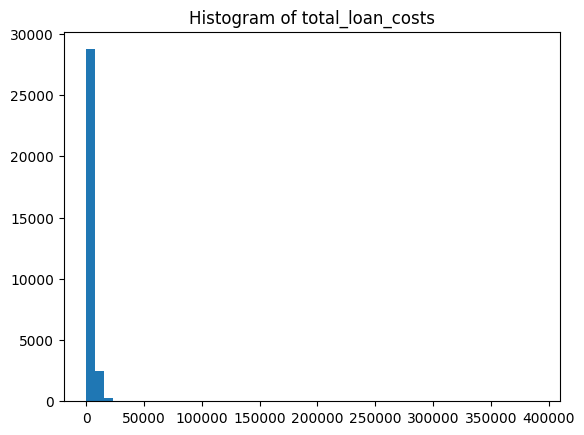

In [10]:
plt.hist(df['total_loan_costs'], bins=50)  # Adjust the number of bins as needed
plt.title('Histogram of total_loan_costs')
plt.show()

[     nan 17537.43  3326.43 ...  4100.7   3700.68  2931.08]
21711


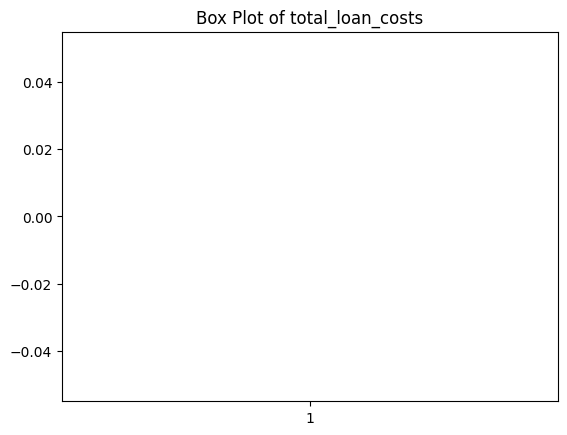

In [11]:
df1 = df.copy()
df1['total_loan_costs'] = pd.to_numeric(df['total_loan_costs'], errors='coerce')

print(df['total_loan_costs'].unique())
print(df['total_loan_costs'].isna().sum())

# Create a box plot of the 'combined_loan_to_value_ratio' column
plt.boxplot(df1['total_loan_costs'])
plt.title('Box Plot of total_loan_costs')
plt.show()

## The outlier squashes the data.
We can draw a boxplot without the outlier.

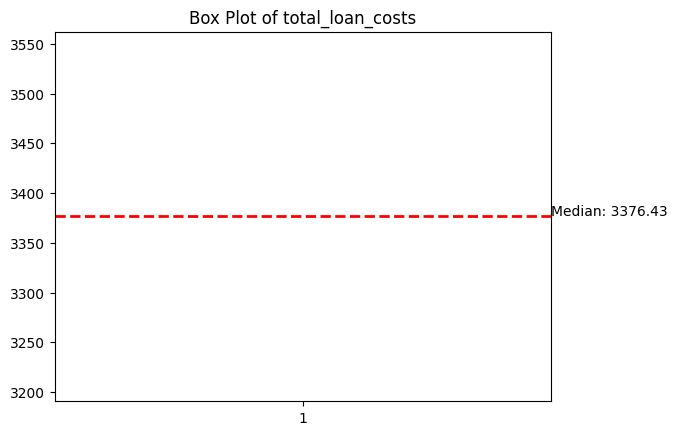

In [12]:
import matplotlib.pyplot as plt

# Create a box plot of the 'total_loan_costs' column
plt.boxplot(df1['total_loan_costs'], showfliers=False)  # Exclude outliers
plt.title('Box Plot of total_loan_costs')

# Calculate the median value
median_value = df1['total_loan_costs'].median()

# Add a median line
plt.axhline(median_value, color='r', linestyle='dashed', linewidth=2)

# Add text with the median value 5 pixels above the line
plt.text(1.5, median_value + 5, f'Median: {median_value}', va='center')

plt.show()


# Conclusion

this meadian seems more normal!
we have to remove outliers.

# Remove outliers

In [13]:
# Calculate the IQR for total_loan_costs
Q1 = df1['total_loan_costs'].quantile(0.25)
Q3 = df1['total_loan_costs'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for outliers
outliers_mask = (df1['total_loan_costs'] < lower_bound) | (df1['total_loan_costs'] > upper_bound)

# Create a new DataFrame without outliers
df_no_outliers = df1[~outliers_mask]

# Display the number of removed outliers
print(f'Number of removed outliers: {outliers_mask.sum()}')

Number of removed outliers: 1853


In [14]:
# Create a DataFrame of removed outliers
outliers_df = df1[outliers_mask]

In [15]:
# Display the values of the removed outliers
print(outliers_df['total_loan_costs'])

21711    17537.43
21731    10516.33
21755     9164.00
21777    11756.30
21788    10520.70
           ...   
53125    15261.86
53126    11296.75
53129    11824.77
53142    11428.06
53182    10472.40
Name: total_loan_costs, Length: 1853, dtype: float64


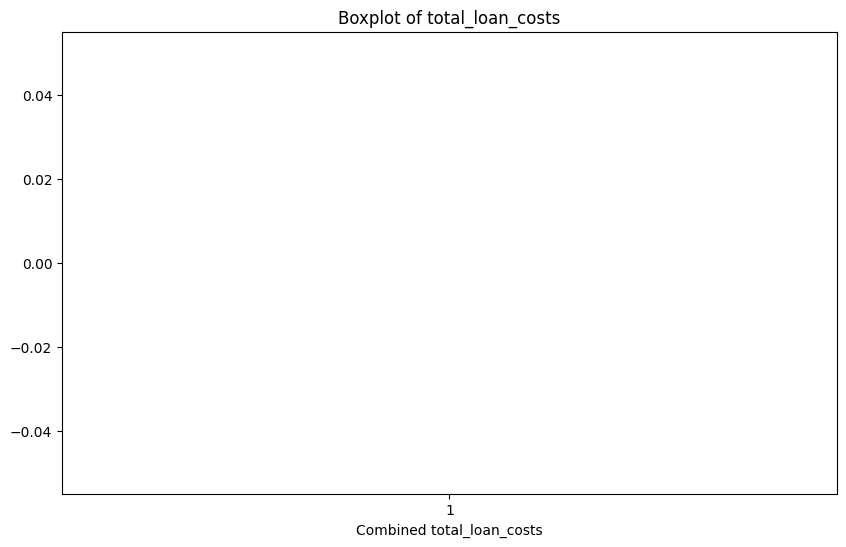

In [16]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_no_outliers['total_loan_costs'])
plt.title('Boxplot of total_loan_costs')
plt.xlabel('Combined total_loan_costs')
plt.show()

In [17]:
# First, convert the 'combined_loan_to_value_ratio' column to numeric (float)
df_no_outliers.loc[:, 'total_loan_costs'] = pd.to_numeric(df_no_outliers['total_loan_costs'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df_no_outliers['total_loan_costs'].min()
maximum_interest_rate = df_no_outliers['total_loan_costs'].max()
median_interest_rate = df_no_outliers['total_loan_costs'].median()

print("Minimum Interest Rate:", minimum_interest_rate)
print("Maximum Interest Rate:", maximum_interest_rate)
print("Median Interest Rate:", median_interest_rate)

Minimum Interest Rate: 0.0
Maximum Interest Rate: 9025.36
Median Interest Rate: 3252.995


In [18]:
print(df_no_outliers['total_loan_costs'].value_counts())

total_loan_costs
0.00       856
695.00     336
635.43     185
15.43      138
505.43     131
          ... 
2876.59      1
5373.00      1
6767.62      1
3801.63      1
2931.08      1
Name: count, Length: 22388, dtype: int64


In [19]:
# Remove categories below 100 entries.

#threshold = 100
#counts = df_no_outliers['total_loan_costs'].value_counts()
#values_to_remove = counts[counts < threshold].index
#df_filtered = df_no_outliers[~df_no_outliers['total_loan_costs'].isin(values_to_remove)]


# Make range categories

In [20]:
import pandas as pd

new_df = df_no_outliers.copy()

# Convert 'total_loan_costs' to numeric values
new_df['total_loan_costs'] = pd.to_numeric(new_df['total_loan_costs'], errors='coerce')

# Define a function to categorize 'total_loan_costs' into the desired ranges
def categorize_total_loan_costs(cost):
    if pd.isna(cost):
        return '0-500'
    if 0 <= cost < 500:
        return '0-500'
    elif 500 <= cost < 1000:
        return '500-1000'
    elif 1000 <= cost < 1500:
        return '1000-1500'
    elif 1500 <= cost < 2000:
        return '1500-2000'
    elif 2000 <= cost < 2500:
        return '2000-2500'
    elif 2500 <= cost < 3000:
        return '2500-3000'
    elif 3000 <= cost < 3500:
        return '3000-3500'
    elif 3500 <= cost < 4000:
        return '3500-4000'
    elif 4000 <= cost < 4500:
        return '4000-4500'
    elif 4500 <= cost < 5000:
        return '4500-5000'
    elif 5000 <= cost < 5500:
        return '5000-5500'
    elif 5500 <= cost < 6000:
        return '5500-6000'
    elif 6000 <= cost < 6500:
        return '6000-6500'
    elif 6500 <= cost < 7000:
        return '6500-7000'
    elif 7000 <= cost < 7500:
        return '7000-7500'
    elif 7500 <= cost < 8000:
        return '7500-8000'
    elif 8000 <= cost < 8500:
        return '8000-8500'
    elif 8500 <= cost < 9000:
        return '8500-9000'
    elif 9000 <= cost < 9500:
        return '9000-9500'
    else:
        print(cost)
        return 'Other'

# Apply the categorization function to 'total_loan_costs' column
new_df['total_loan_costs'] = new_df['total_loan_costs'].apply(categorize_total_loan_costs)

# Print the result
print(new_df['total_loan_costs'].value_counts())


total_loan_costs
0-500        23430
3000-3500     3700
2500-3000     3659
3500-4000     2987
500-1000      2624
2000-2500     2545
4000-4500     2317
4500-5000     1812
5000-5500     1408
1500-2000     1317
5500-6000     1115
1000-1500     1067
6000-6500      865
6500-7000      754
7000-7500      539
7500-8000      489
8000-8500      379
8500-9000      311
9000-9500       15
Name: count, dtype: int64


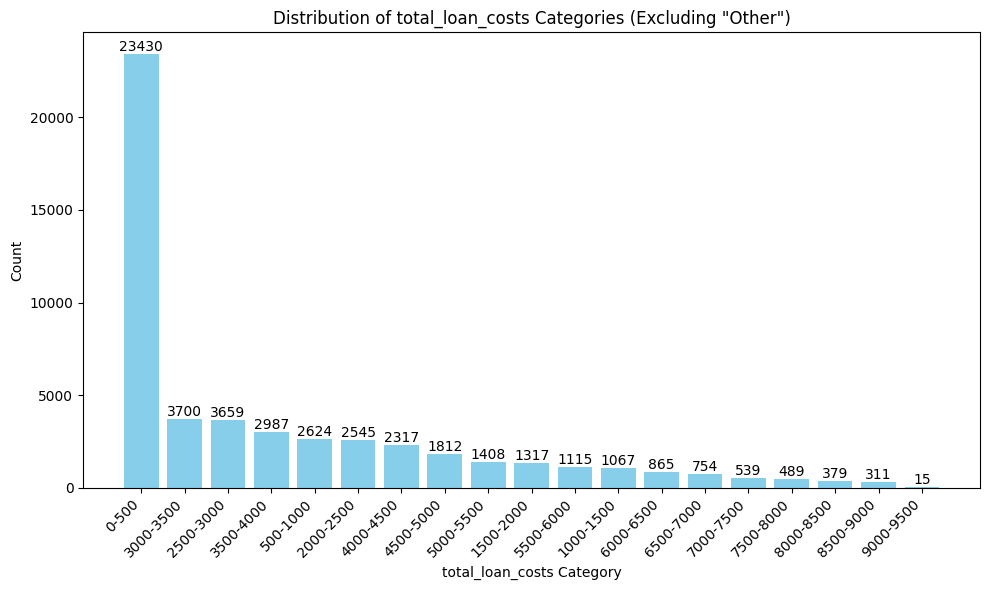

In [21]:
# Filter the DataFrame to exclude the 'Other' category
filtered_df = new_df[new_df['total_loan_costs'] != 'Other']

# Get the value counts for the filtered DataFrame
value_counts = filtered_df['total_loan_costs'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('total_loan_costs Category')
plt.ylabel('Count')
plt.title('Distribution of total_loan_costs Categories (Excluding "Other")')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Display the counts on top of the bars
for i, count in enumerate(value_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [22]:
new_df.to_csv('7_total_loan_costs.csv', index=False)